In [2]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [6]:
df_data.shape

(126237, 33)

In [7]:
df_data.columns

Index(['regione', 'citta', 'quartiere', 'prezzo', 'datetime', 'posti auto',
       'bagni per stanza', 'bagni', 'stanze', 'ultimo piano', 'stato',
       'classe energetica', 'vista mare', 'riscaldamento centralizzato',
       'superficie', 'arredato', 'balcone', 'impianto tv',
       'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina',
       'giardino comune', 'giardino privato', 'impianto allarme', 'portiere',
       'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico',
       'loft', 'mansarda'],
      dtype='object')

In [8]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

In [9]:
df_data.duplicated().values.any()

np.True_

In [10]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


,region,city,neighborhood,price,datetime,parking spots,bathrooms per room,bathrooms,rooms,top floor,...,private garden,alarm system,doorman,pool,villa,entire property,apartment,penthouse,loft,attic
47959,lombardia,Abbiategrasso,Via Francesco De Sanctis,900.00,2023-05-19,0,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
47919,lombardia,Abbiategrasso,Via Francesco De Sanctis,900.00,2023-05-19,0,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
73887,sicilia,Agrigento,Via Empedocle,400.00,2023-08-06,0,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
7799,sicilia,Agrigento,ViaMinerva,750.00,2023-03-21,1,0.50,2.00,4.00,0,...,0,0,0,0,0,0,1,0,0,0
72427,sicilia,Agrigento,Via Empedocle,400.00,2023-08-06,0,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67710,piemonte,Vinovo,Via Nessa,695.00,2023-05-06,0,0.50,2.00,4.00,0,...,1,0,0,0,0,0,1,0,0,0
12724,veneto,Vittorio Veneto,Via del Maniero,650.00,2023-03-04,1,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
12850,veneto,Vittorio Veneto,Via del Maniero,650.00,2023-03-04,1,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
121876,lazio,Zagarolo,Via del Cinema,550.00,2023-07-24,0,1.00,1.00,1.00,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
df_data = df_data.drop_duplicates()

In [12]:
df_data.isna().sum()

region                   12
city                     15
neighborhood           7410
price                  5688
datetime                  0
parking spots             0
bathrooms per room    10669
bathrooms              4052
rooms                  8503
top floor                 0
condition              8276
energy class          24148
sea view                112
central heating       18373
area                   9731
furnished                 0
balcony                   0
TV system                 0
external exposure         0
fiber optic               0
electric gate             0
cellar                    0
shared garden             0
private garden            0
alarm system              0
doorman                   0
pool                      0
villa                     0
entire property           0
apartment                 0
penthouse                 0
loft                      0
attic                     0
dtype: int64

In [13]:
df_data[df_data.isna().any(axis=1)]

,region,city,neighborhood,price,datetime,parking spots,bathrooms per room,bathrooms,rooms,top floor,...,private garden,alarm system,doorman,pool,villa,entire property,apartment,penthouse,loft,attic
0,NaN,Milano,Centrale,"1,800.00",2023-07-03,1,0.33,1.00,3.00,0,...,0,0,0,0,0,0,1,0,0,0
1,NaN,Torino,Santa Rita,450.00,2023-07-03,0,0.50,1.00,2.00,1,...,0,0,0,0,0,0,1,0,0,0
2,NaN,Padova,Prato della Valle - Pontecorvo,"3,200.00",2023-07-03,1,NaN,3.00,NaN,0,...,0,0,0,0,0,0,1,0,0,0
3,NaN,Firenze,Galluzzo,"1,700.00",2022-12-21,0,NaN,3.00,NaN,1,...,1,0,0,0,1,0,0,0,0,0
4,NaN,Monte Argentario,Località Poggio Pertuso,"4,000.00",2023-06-03,1,0.60,3.00,5.00,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126204,sicilia,Palermo,Giotto Galilei - Palagonia,"1,200.00",2023-07-27,0,NaN,2.00,NaN,1,...,0,0,0,0,0,0,1,0,0,0
126206,emilia-Romagna,Bologna,Barca,"1,300.00",2023-07-27,0,0.67,2.00,3.00,0,...,0,0,0,0,0,0,1,0,0,0
126210,calabria,Catanzaro,Mater Domini - Cavita,450.00,2023-07-26,0,0.67,2.00,3.00,0,...,0,0,0,0,0,0,1,0,0,0
126218,friuli-venezia-giulia,Trieste,Borgo Teresiano,850.00,2023-07-26,0,2.00,4.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df_data = df_data.dropna()

In [15]:
df_data.isna().sum()

region                0
city                  0
neighborhood          0
price                 0
datetime              0
parking spots         0
bathrooms per room    0
bathrooms             0
rooms                 0
top floor             0
condition             0
energy class          0
sea view              0
central heating       0
area                  0
furnished             0
balcony               0
TV system             0
external exposure     0
fiber optic           0
electric gate         0
cellar                0
shared garden         0
private garden        0
alarm system          0
doorman               0
pool                  0
villa                 0
entire property       0
apartment             0
penthouse             0
loft                  0
attic                 0
dtype: int64

In [16]:
df_data.shape

(70092, 33)

In [17]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                    float64
rooms                        float64
top floor                      int64
condition                     object
energy class                  object
sea view                     float64
central heating              float64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [18]:
df_data.head()

,region,city,neighborhood,price,datetime,parking spots,bathrooms per room,bathrooms,rooms,top floor,...,private garden,alarm system,doorman,pool,villa,entire property,apartment,penthouse,loft,attic
12,lombardia,Milano,Isola,"1,800.00",2023-07-03,0,0.50,1.00,2.00,1,...,1,0,0,0,0,0,1,0,0,0
13,piemonte,Torino,Via della Rocca,500.00,2023-08-03,0,1.00,1.00,1.00,0,...,0,0,0,0,0,0,1,0,0,0
15,emilia-romagna,Bologna,Saragozza fuori Porta,825.00,2023-08-03,1,0.50,1.00,2.00,0,...,0,0,0,0,0,0,1,0,0,0
16,liguria,Genova,Prè,550.00,2023-08-03,0,0.33,1.00,3.00,0,...,0,0,0,0,0,0,1,0,0,0
19,calabria,Catanzaro,Sant'Antonio - De Filippis,500.00,2023-06-03,0,0.33,1.00,3.00,0,...,0,0,0,0,0,0,1,0,0,0


### Percentage of flats by each city

In [19]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [20]:
df_data['price'].describe()

count      70,092.00
mean        1,234.70
std         8,251.34
min             1.00
25%           550.00
50%           760.00
75%         1,250.00
max     1,150,000.00
Name: price, dtype: float64

In [21]:
df_filtered_outliers = df_data[(df_data.price > 100) & (df_data.price < 2000) & (df_data.area > 10)]

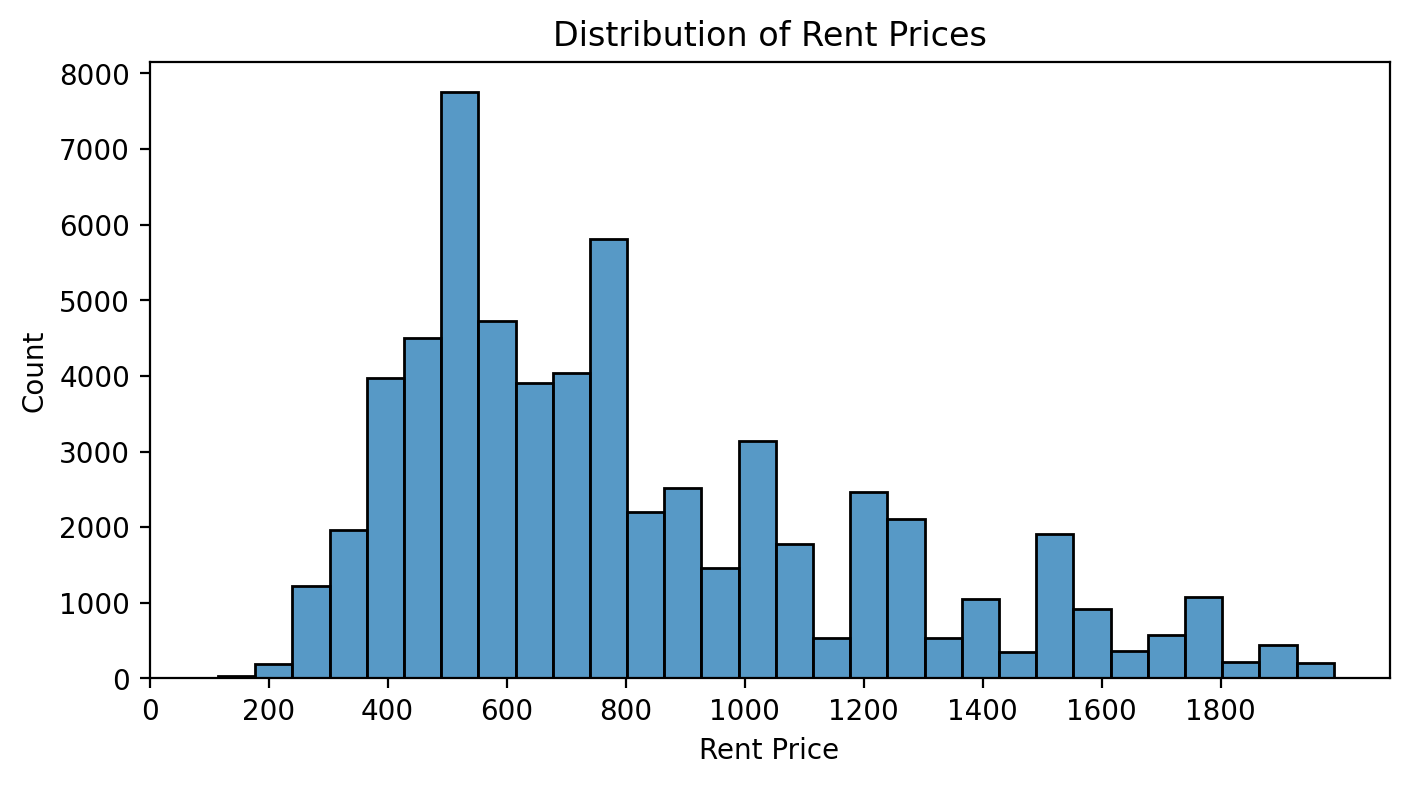

In [22]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=30)
plt.xlabel('Rent Price')
plt.xticks(range(0, 2000, 200))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [23]:
df_data['area'].describe()

count   70,092.00
mean        73.28
std         35.15
min          1.00
25%         50.00
50%         65.00
75%         90.00
max        300.00
Name: area, dtype: float64

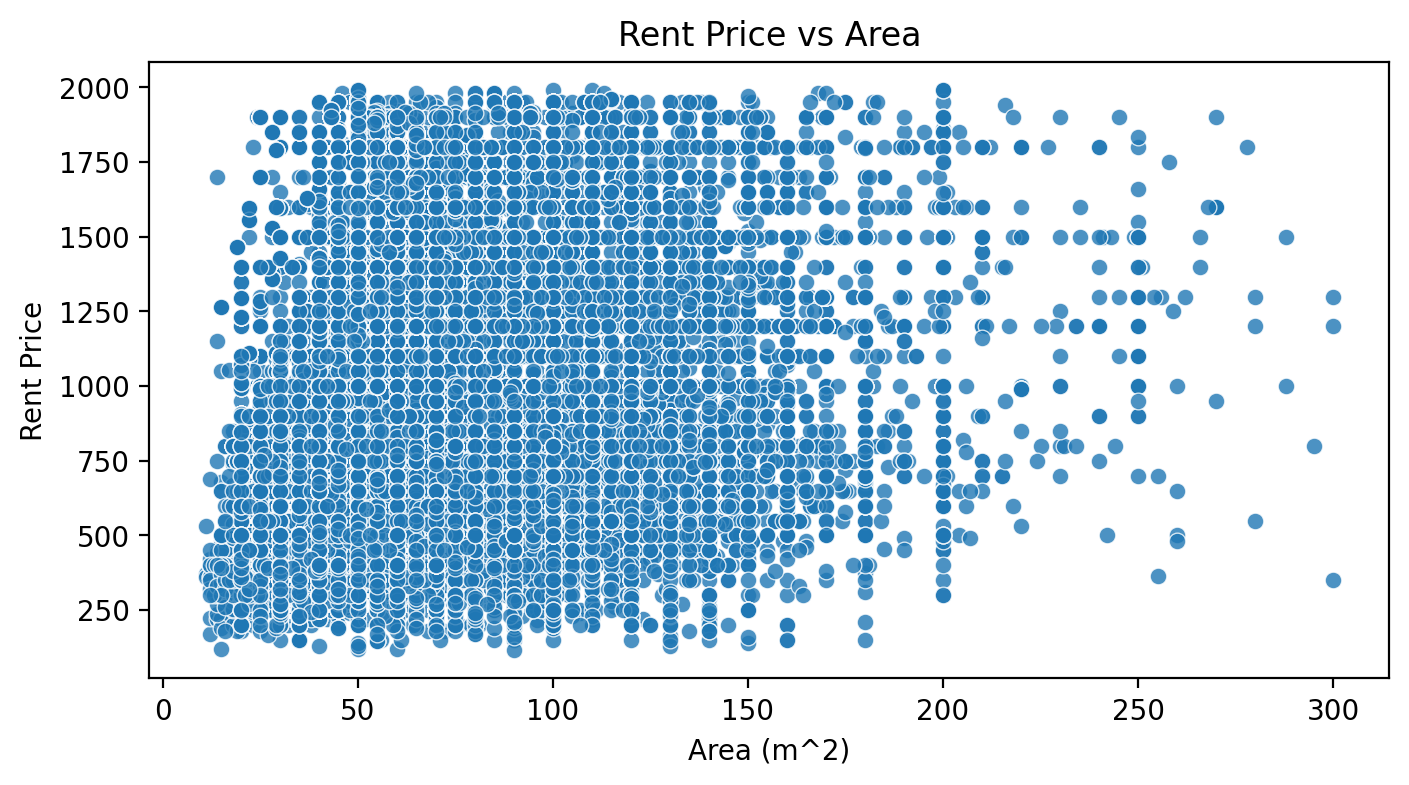

In [24]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [25]:
df_data.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic'],
      dtype='object')

### Property Count by Type

In [26]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()

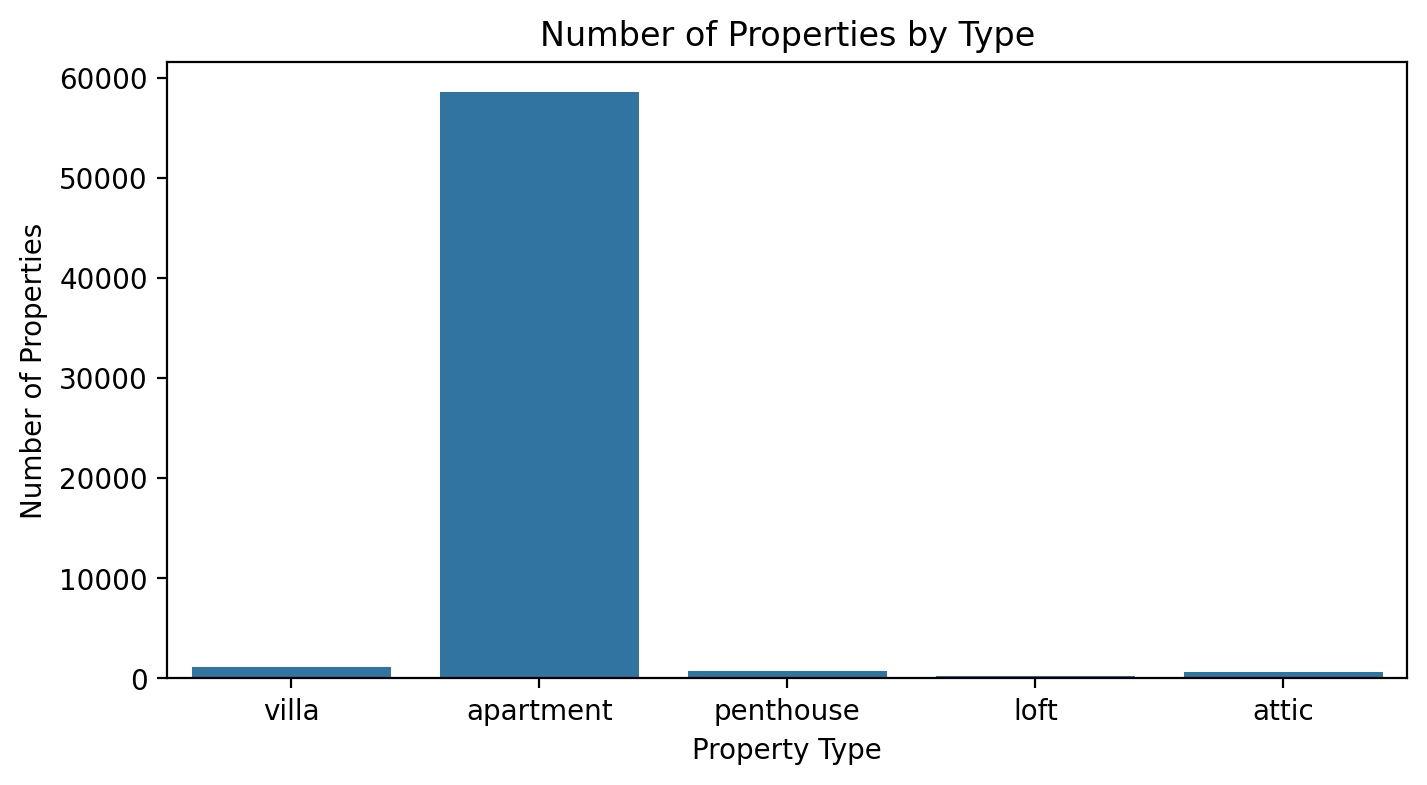

In [27]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

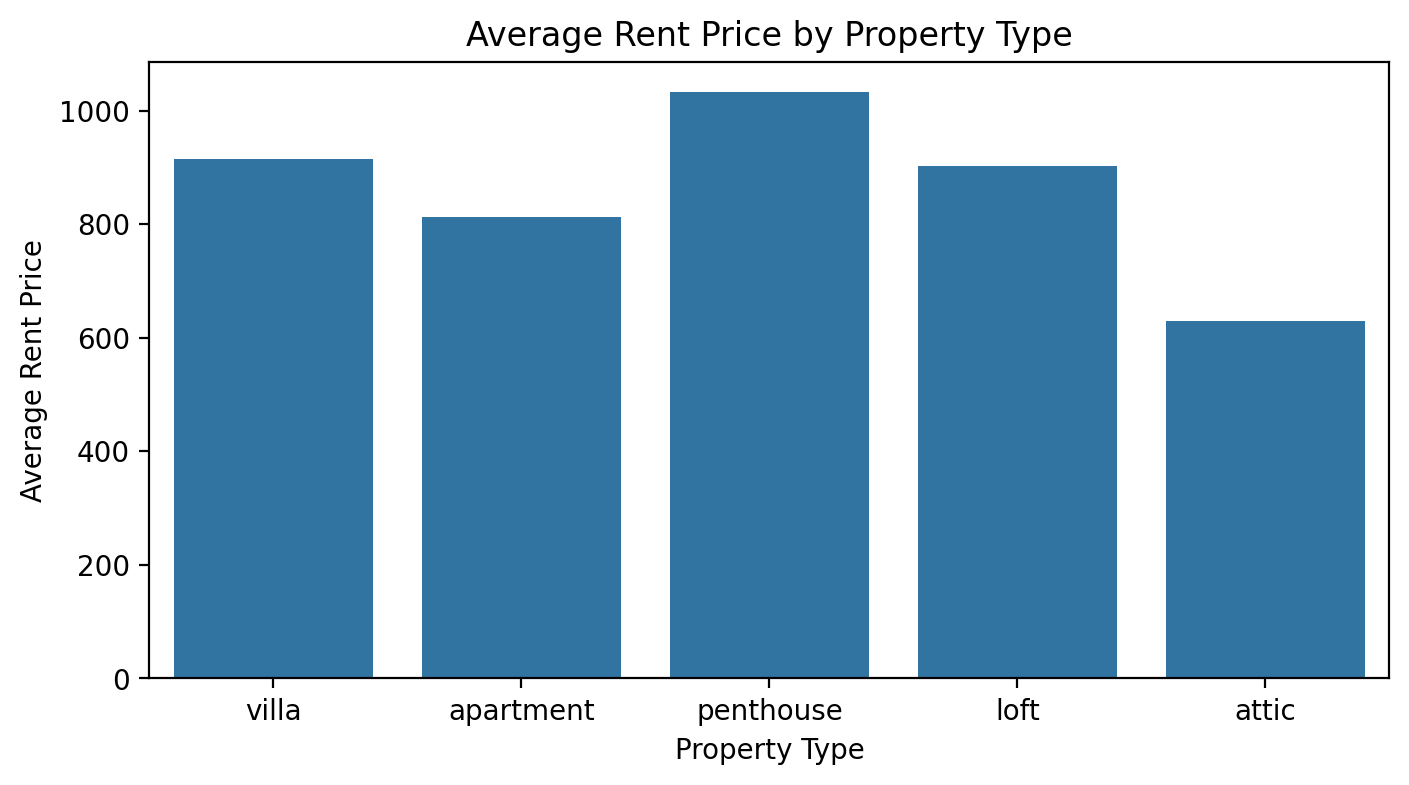

In [28]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [29]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

region
Liguria                   350.00
l-aquila                  400.00
umbria                    477.74
genova                    504.29
molise                    543.63
basilicata                555.89
palermo                   565.00
calabria                  571.17
piemonte                  585.60
catanzaro                 595.94
marche                    613.81
puglia                    654.84
abruzzo                   659.91
sicilia                   666.54
liguria                   666.58
bari                      700.00
torino                    700.00
napoli                    750.00
campania                  757.39
valle-d-aosta             762.84
friuli-venezia-giulia     798.96
sardegna                  808.55
veneto                    810.18
emilia-romagna            829.46
lazio                     869.63
trentino-alto-adige       886.23
trieste                   904.82
toscana                   919.38
lombardia               1,061.84
emilia-Romagna          1,130.08
ven

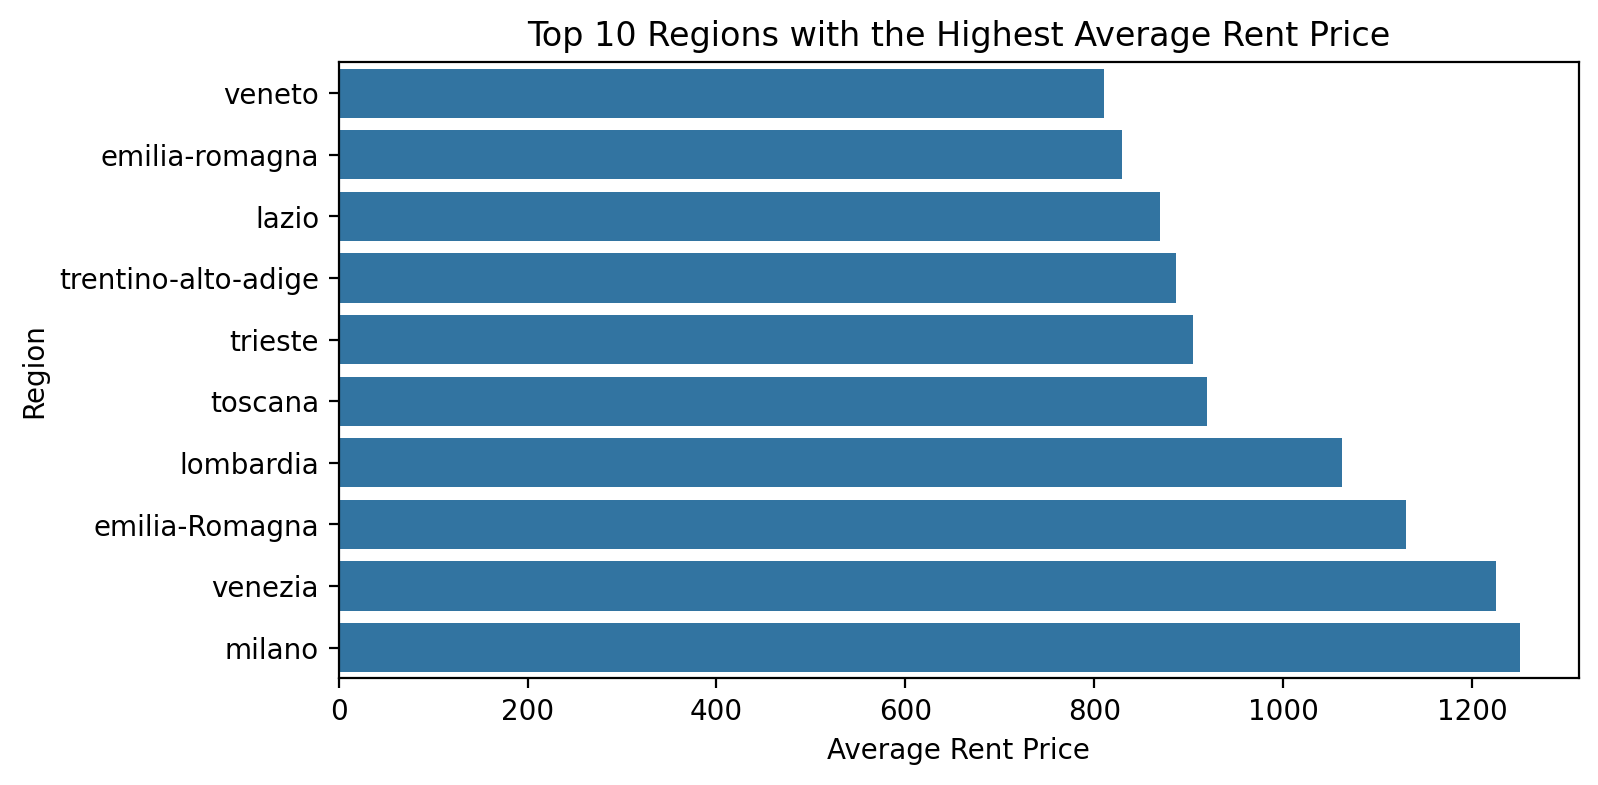

In [30]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


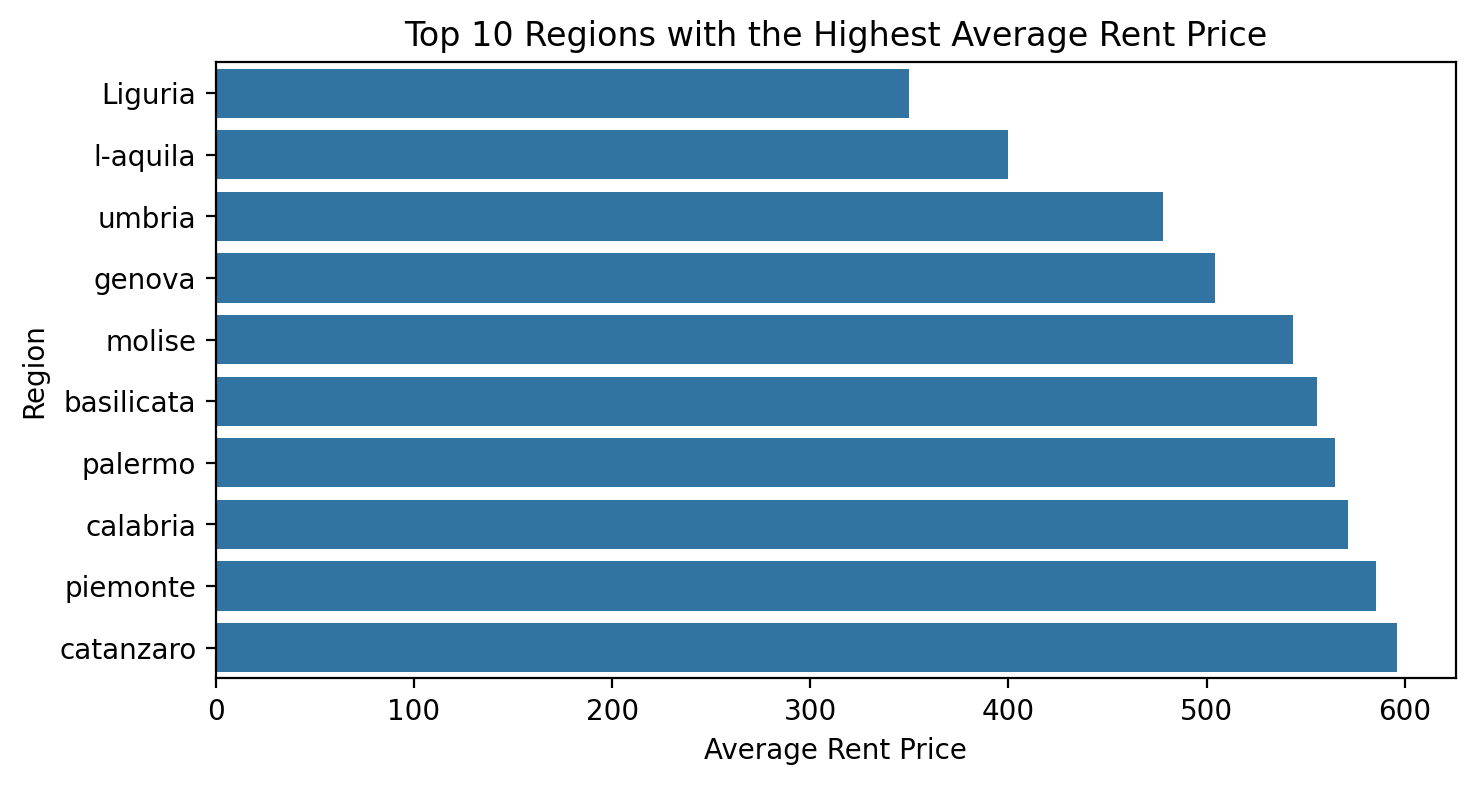

In [31]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()

In [32]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14684\3984004893.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



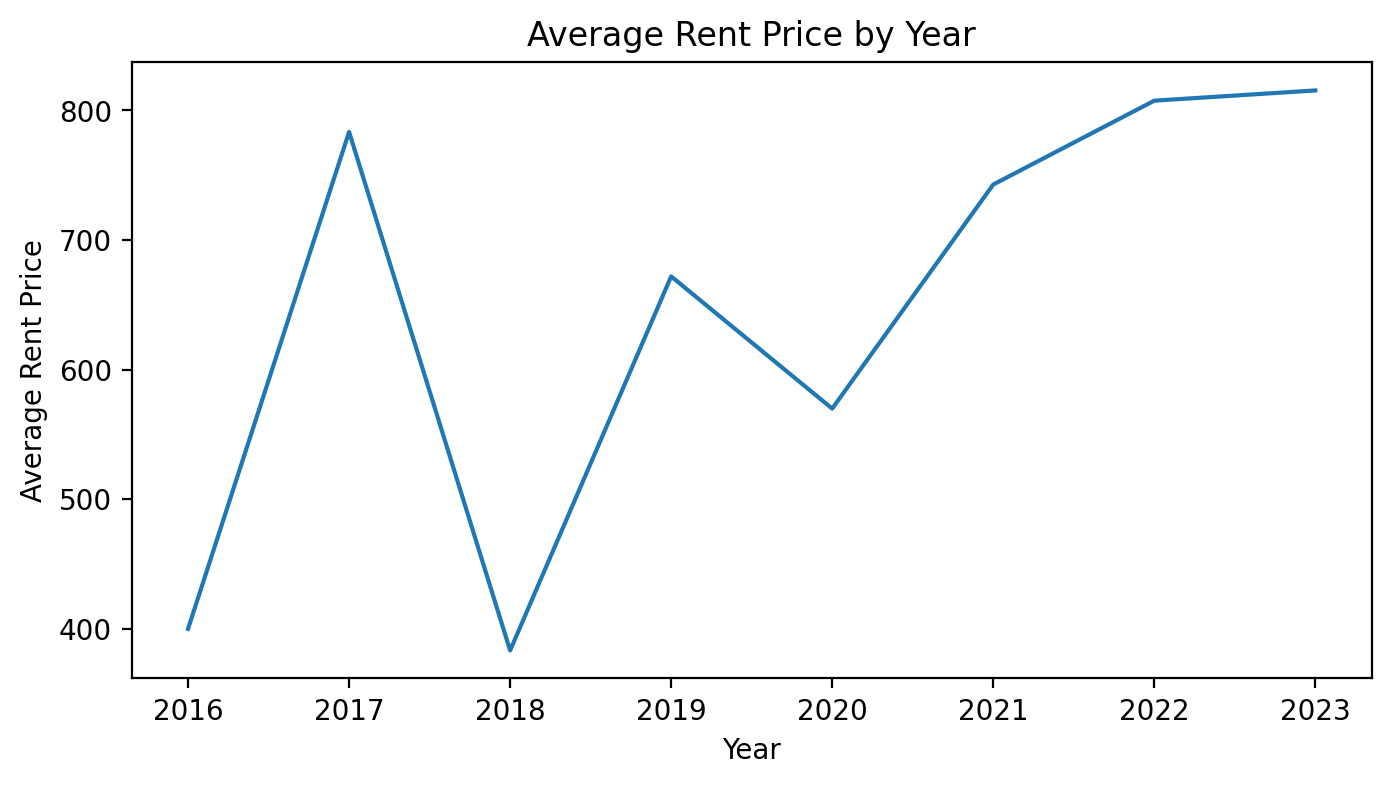

In [33]:
df_filtered_outliers['year'] = df_filtered_outliers.datetime.dt.year

average_prices_by_year = df_filtered_outliers.groupby('year')['price'].mean()

plt.figure(figsize=(8, 4), dpi=200)
sns.lineplot(x=average_prices_by_year.index, y=average_prices_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Year')
plt.show()


In [34]:
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

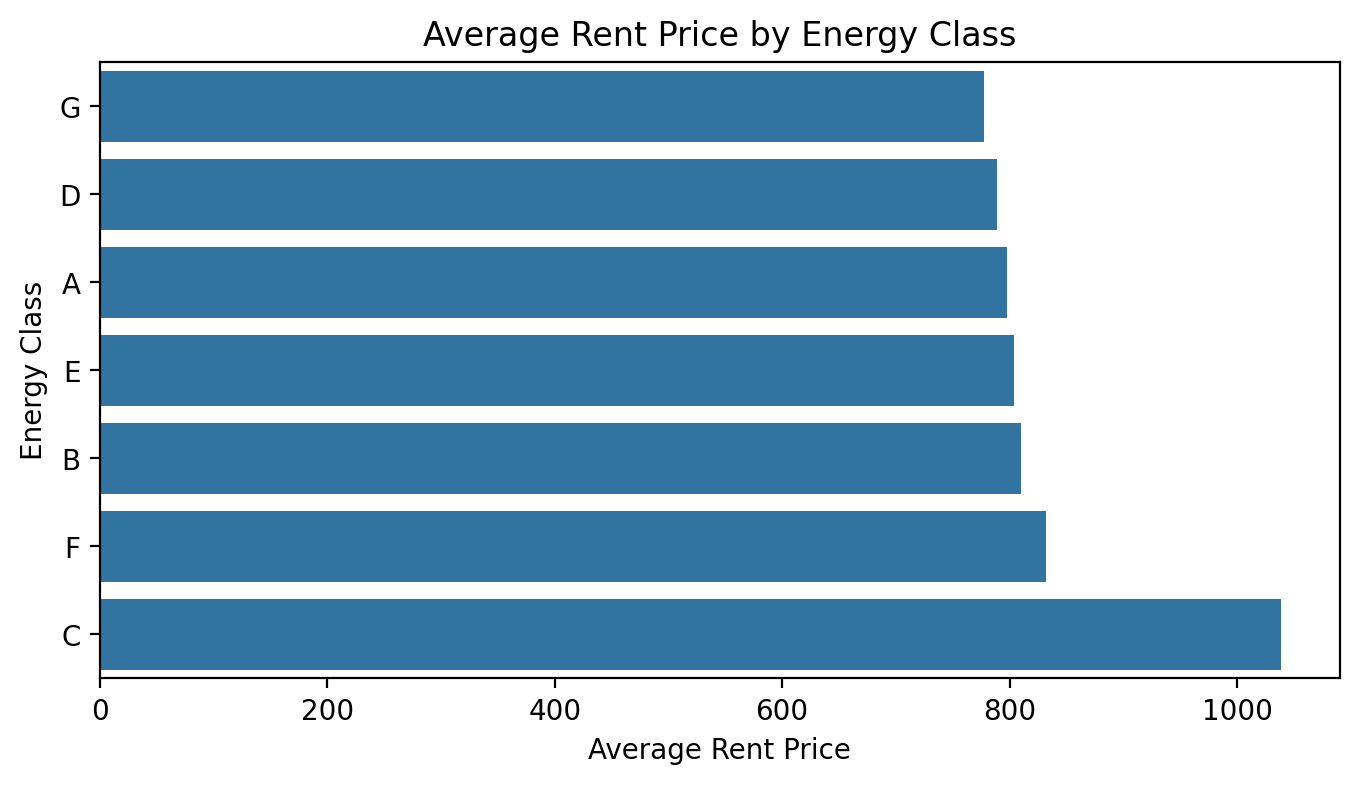

In [35]:
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

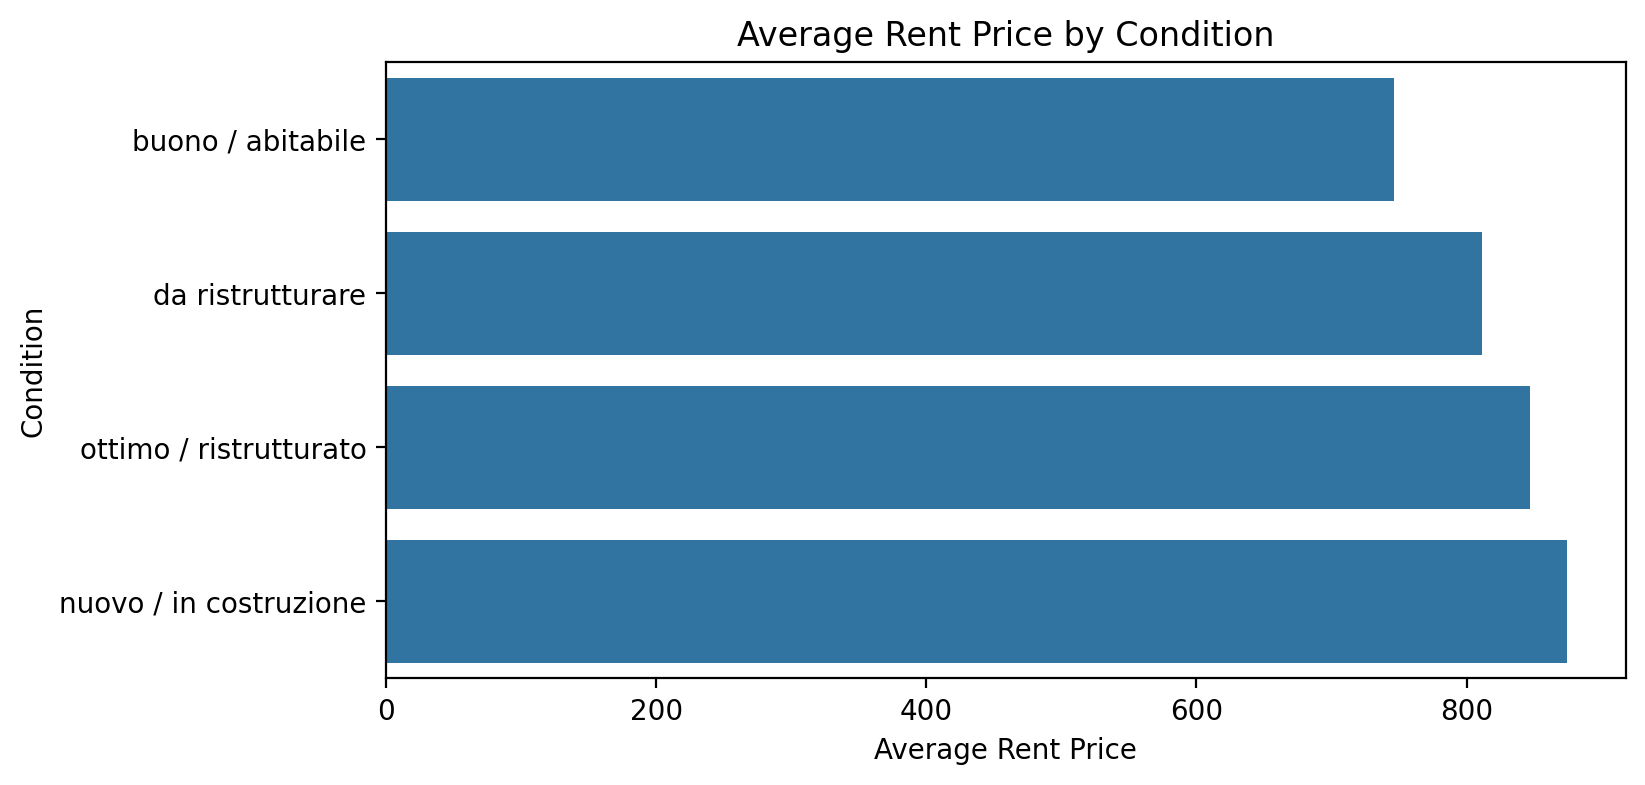

In [36]:
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

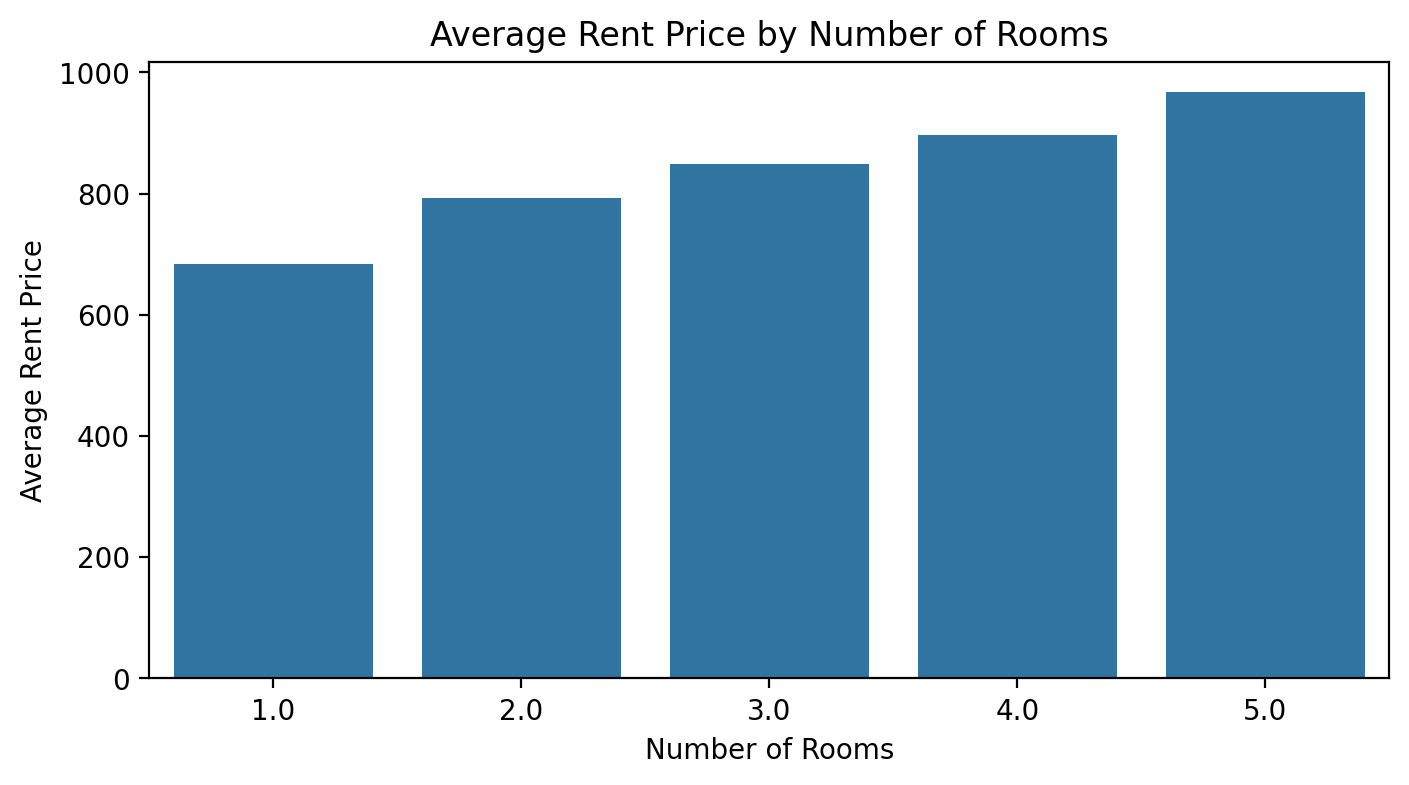

In [37]:
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

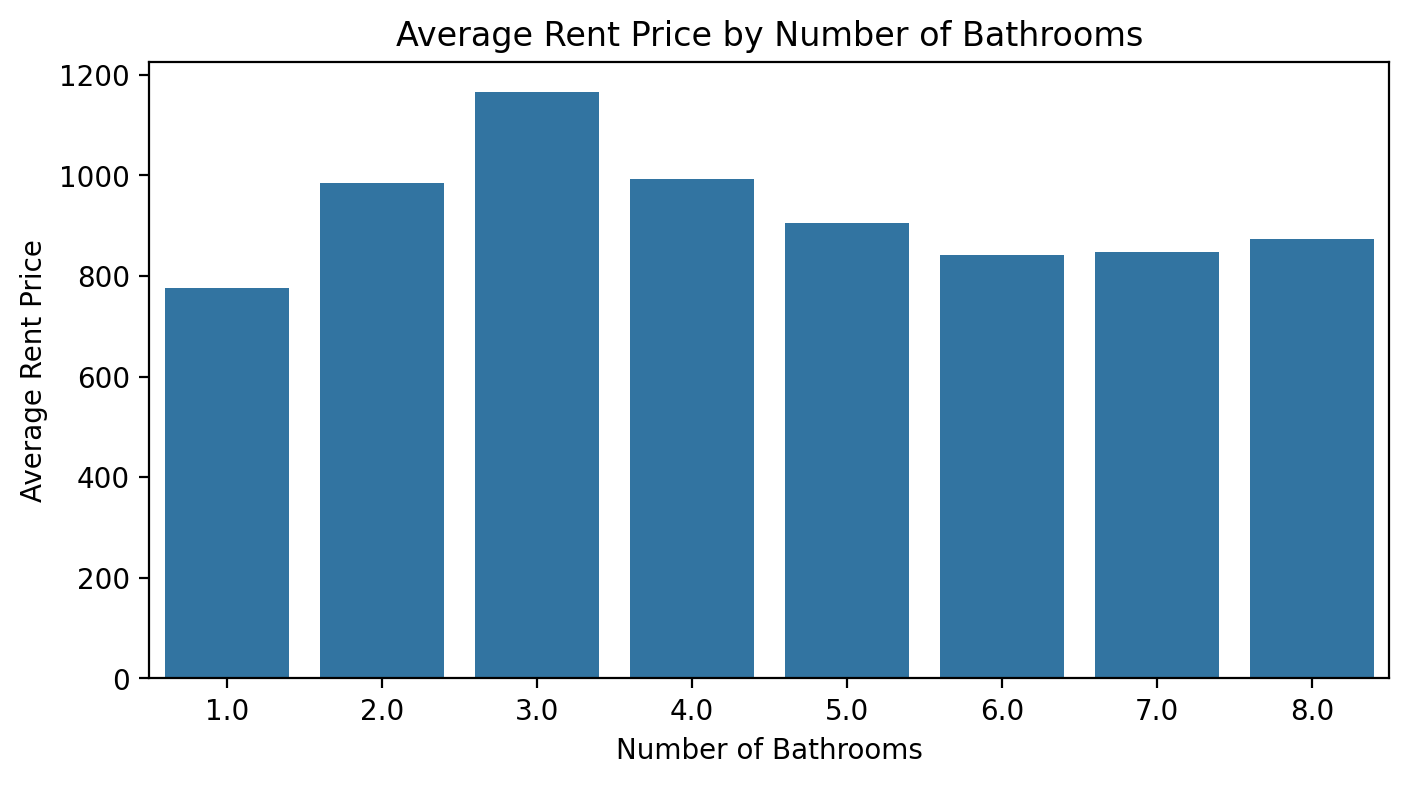

In [38]:
average_prices_by_bathrooms = df_filtered_outliers.groupby('bathrooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_bathrooms.index, y=average_prices_by_bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Bathrooms')
plt.show()

### Regression Plot

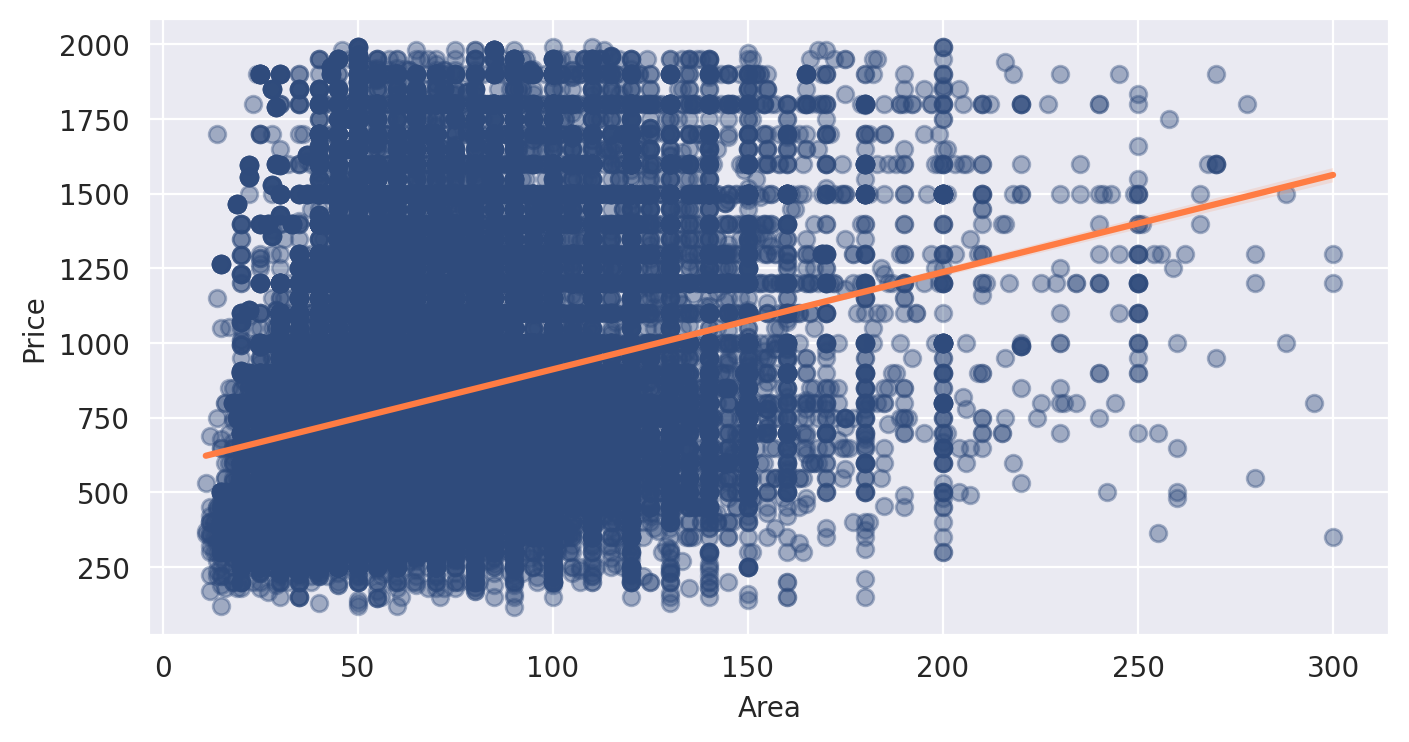

In [53]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=df_filtered_outliers,
            x='area',
            y='price',
            scatter_kws = {'alpha': 0.4,'color': "#2f4b7c"},
            line_kws = {'color': '#ff7c43'})


  ax.set(
        ylabel='Price',
        xlabel='Area',)


## Train Model using Linear Regression

In [40]:
%pip install scikit-learn

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
columns = ['parking spots', 'bathrooms per room', 'bathrooms', 'rooms', 'top floor',
       'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic']

In [43]:
regression = LinearRegression()

X = pd.DataFrame(df_filtered_outliers, columns=columns)
y = pd.DataFrame(df_filtered_outliers, columns=['price'])

regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

[517.34358936]
[[-1.42213649e+02 -2.38219619e+02  1.89805616e+02 -6.27069201e+01
  -3.26228610e+01  7.97581071e+01  1.36507660e+02  4.03150378e+00
   6.76293967e+01 -1.13843590e+02 -2.84217094e-14  1.62789869e+01
   1.25789378e+02 -2.34762758e+01 -5.94316108e+01  3.50958697e+01
  -2.39185805e+01  1.42108547e-14  2.84217094e-14  2.01353629e+02
   4.50352382e+01  1.42108547e-14  4.99063226e+01  1.92391522e+02
   1.18706343e+02 -6.84230600e+01]]


In [58]:
regression.score(X, y)

0.1995302588409016

In [67]:
parking_spots = 0
bathrooms_per_room = 0.5
bathrooms = 1
rooms = 2
top_floor = 0
sea_view = 0
central_heating = 1
area = 40
furnished = 0
balcony = 1
tv_system = 0
external_exposure = 1
fiber_optic = 0
electric_gate = 0
cellar = 0
shared_garden = 0
private_garden = 0
alarm_system = 0
doorman = 0
pool = 0
villa = 0
entire_property = 0
apartment = 1
penthouse = 0
loft = 0
attic = 0



price_estimate = (regression.intercept_[0] 
                    + regression.coef_[0,0] * parking_spots
                    + regression.coef_[0,1] * bathrooms_per_room
                    + regression.coef_[0,2] * bathrooms
                    + regression.coef_[0,3] * rooms
                    + regression.coef_[0,4] * top_floor
                    + regression.coef_[0,5] * sea_view
                    + regression.coef_[0,6] * central_heating
                    + regression.coef_[0,7] * area
                    + regression.coef_[0,8] * furnished
                    + regression.coef_[0,9] * balcony
                    + regression.coef_[0,10] * tv_system
                    + regression.coef_[0,11] * external_exposure
                    + regression.coef_[0,12] * fiber_optic
                    + regression.coef_[0,13] * electric_gate
                    + regression.coef_[0,14] * cellar
                    + regression.coef_[0,15] * shared_garden
                    + regression.coef_[0,16] * private_garden
                    + regression.coef_[0,17] * alarm_system
                    + regression.coef_[0,18] * doorman
                    + regression.coef_[0,19] * pool
                    + regression.coef_[0,20] * villa
                    + regression.coef_[0,21] * entire_property
                    + regression.coef_[0,22] * apartment
                    + regression.coef_[0,23] * penthouse
                    + regression.coef_[0,24] * loft
                    + regression.coef_[0,25] * attic
                  )


print(f'The estimated rent price is around €{price_estimate:.10}.')

The estimated rent price is around €712.7350854.


## Prediction using DecesionTreeRegressor Algorithm

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
X = pd.DataFrame(df_filtered_outliers, columns=columns)
y = pd.DataFrame(df_filtered_outliers, columns=['price'])

model = DecisionTreeRegressor()
model.fit(X, y)

prediction_input = pd.DataFrame([[parking_spots, bathrooms_per_room, bathrooms, rooms, top_floor, sea_view, central_heating, area, furnished, balcony, tv_system, external_exposure, fiber_optic, electric_gate, cellar, shared_garden, private_garden, alarm_system, doorman, pool, villa, entire_property, apartment, penthouse, loft, attic]], columns=columns)


prediction = model.predict(prediction_input)
print(prediction)

print(model.score(X, y))

[700.]
0.6907574276993766
